# Regularization and Gradient Descent Exercises
![UnderOverFit.png](Assets/UnderOverFit.png)


# Learning Objectives

- Explain cost functions, regularization, feature selection, and hyper-parameters
- Summarize complex statistical optimization algorithms like gradient descent and its application to linear regression
- Apply Intel® Extension for Scikit-learn* to leverage underlying compute capabilities of hardware

# scikit-learn*

Frameworks provide structure that Data Scientists use to build code. Frameworks are more than just libraries, because in addition to callable code, frameworks influence how code is written.

A main virtue of using an optimized framework is that code runs faster. Code that runs faster is just generally more convenient but when we begin looking at applied data science and AI models, we can see more material benefits. Here you will see how optimization, particularly hyperparameter optimization can benefit more than just speed.

These exercises will demonstrate how to apply **the Intel® Extension for Scikit-learn*,** a seamless way to speed up your Scikit-learn application. The acceleration is achieved through the use of the Intel® oneAPI Data Analytics Library (oneDAL). Patching is the term used to extend scikit-learn with Intel optimizations and makes it a well-suited machine learning framework for dealing with real-life problems.

To get optimized versions of many Scikit-learn algorithms using a patch() approach consisting of adding these lines of code prior to importing sklearn:

- **from sklearnex import patch_sklearn**
- **patch_sklearn()**

## This exercise relies on installation of  Intel® Extension for Scikit-learn*

If you have not already done so, follow the instructions from Week 1 for instructions


## Introduction

We will begin with a short tutorial on regression, polynomial features, and regularization based on a very simple, sparse data set that contains a column of `x` data and associated `y` noisy data. The data file is called `X_Y_Sinusoid_Data.csv`.

In [2]:
!pip install scikit-learn-intelex

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.3/110.3 MB 6.7 MB/s eta 0:00:00


In [3]:
from __future__ import print_function
import os
data_path = ['../data']

from sklearnex import patch_sklearn
patch_sklearn()

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import MinMaxScaler


Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


## Question 1

* Import the data.

* Also generate approximately 100 equally spaced x data points over the range of 0 to 1. Using these points, calculate the y-data which represents the "ground truth" (the real function) from the equation: $y = sin(2\pi x)$

* Plot the sparse data (`x` vs `y`) and the calculated ("real") data.


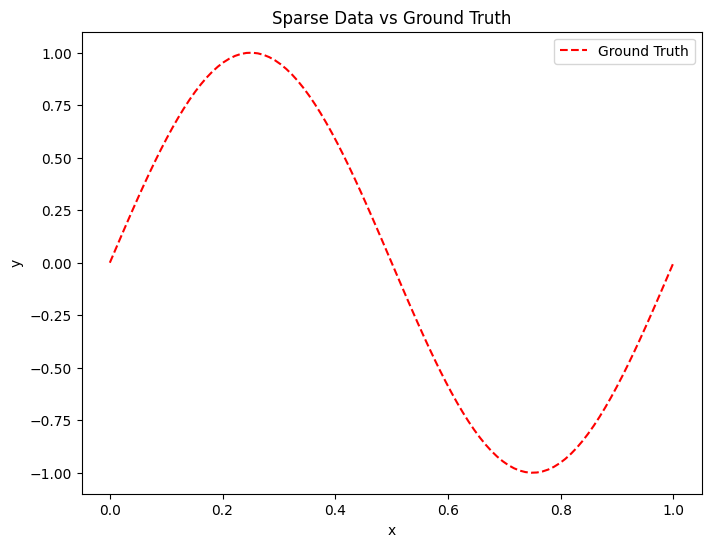

In [4]:
import pandas as pd
import numpy as np

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

X_real = np.linspace(0, 1.0, 100)
Y_real = np.sin(2 * np.pi * X_real)

plt.figure(figsize=(8, 6))
plt.plot(X_real, Y_real, label='Ground Truth', color='red', linestyle='--')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sparse Data vs Ground Truth')
plt.show()



## Question 2


* Using the `PolynomialFeatures` class from Scikit-learn's preprocessing library, create 20th order polynomial features.
* Fit this data using linear regression.
* Plot the resulting predicted value compared to the calculated data.

Note that `PolynomialFeatures` requires either a dataframe (with one column, not a Series) or a 2D array of dimension (`X`, 1), where `X` is the length.

          x         y
0  0.038571  0.066391
1  0.166776  1.027483
2  0.183153  1.245302
3  0.187359  1.004781
4  0.243116  1.264121


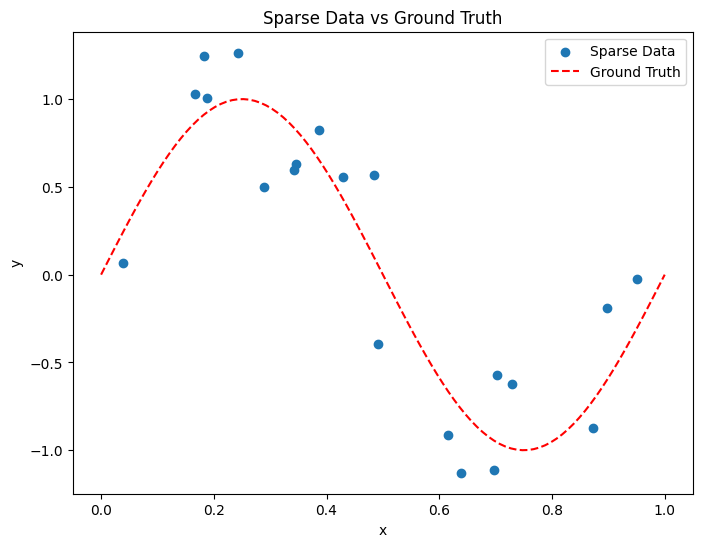

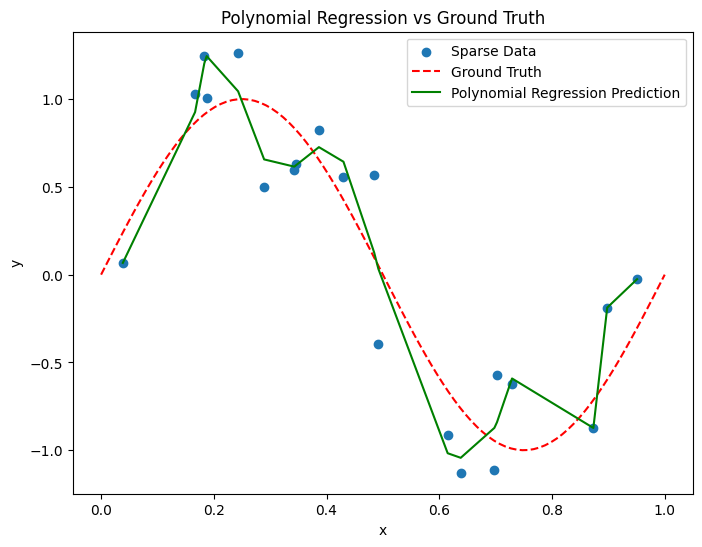

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

filepath = "path_to_file/X_Y_Sinusoid_Data.csv"
data = pd.read_csv("/content/X_Y_Sinusoid_Data.csv")

print(data.head())

X_real = np.linspace(0, 1.0, 100)
Y_real = np.sin(2 * np.pi * X_real)

plt.figure(figsize=(8, 6))
plt.scatter(data['x'], data['y'], label='Sparse Data')
plt.plot(X_real, Y_real, label='Ground Truth', color='red', linestyle='--')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sparse Data vs Ground Truth')
plt.show()

degree = 20
pf = PolynomialFeatures(degree)
X_poly = pf.fit_transform(data[['x']])
lr = LinearRegression()
lr.fit(X_poly, data['y'])

Y_pred = lr.predict(X_poly)

plt.figure(figsize=(8, 6))
plt.scatter(data['x'], data['y'], label='Sparse Data')
plt.plot(X_real, Y_real, label='Ground Truth', color='red', linestyle='--')
plt.plot(data['x'], Y_pred, label='Polynomial Regression Prediction', color='green')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression vs Ground Truth')
plt.show()


## Question 3

* Perform the regression on using the data with polynomial features using ridge regression ($\alpha$=0.001) and lasso regression ($\alpha$=0.0001).
* Plot the results, as was done in Question 1.
* Also plot the magnitude of the coefficients obtained from these regressions, and compare them to those obtained from linear regression in the previous question. The linear regression coefficients will likely need a separate plot (or their own y-axis) due to their large magnitude.

What does the comparatively large magnitude of the data tell you about the role of regularization?

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.470e-01, tolerance: 1.223e-03
  model = cd_fast.enet_coordinate_descent(


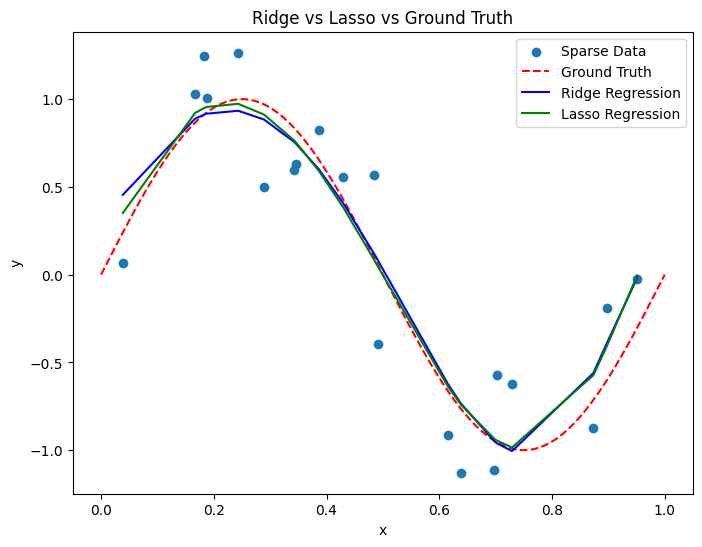

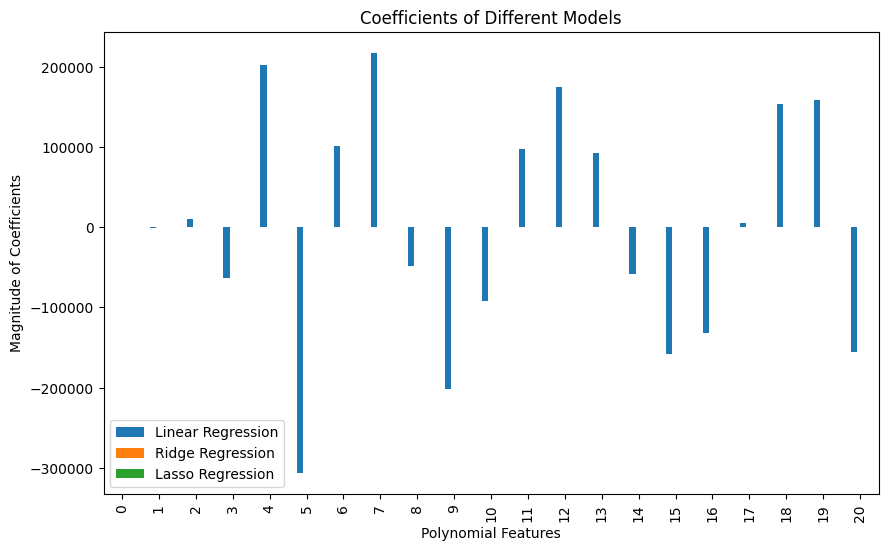

In [8]:
# Mute the sklearn warning about regularization
from sklearn.linear_model import Ridge, Lasso
import seaborn as sns
import pandas as pd
ridge = Ridge(alpha=0.001)
ridge.fit(X_poly, data['y'])
Y_ridge_pred = ridge.predict(X_poly)

lasso = Lasso(alpha=0.0001)
lasso.fit(X_poly, data['y'])
Y_lasso_pred = lasso.predict(X_poly)

plt.figure(figsize=(8, 6))
plt.scatter(data['x'], data['y'], label='Sparse Data')
plt.plot(X_real, Y_real, label='Ground Truth', color='red', linestyle='--')
plt.plot(data['x'], Y_ridge_pred, label='Ridge Regression', color='blue')
plt.plot(data['x'], Y_lasso_pred, label='Lasso Regression', color='green')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ridge vs Lasso vs Ground Truth')
plt.show()

coefficients = pd.DataFrame({
    'Linear Regression': lr.coef_,
    'Ridge Regression': ridge.coef_,
    'Lasso Regression': lasso.coef_
})

coefficients.plot(kind='bar', figsize=(10, 6))
plt.title('Coefficients of Different Models')
plt.ylabel('Magnitude of Coefficients')
plt.xlabel('Polynomial Features')
plt.show()



## Question 4

For the remaining questions, we will be working with the [data set](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) from last lesson, which is based on housing prices in Ames, Iowa. There are an extensive number of features--see the exercises from week three for a discussion of these features.

To begin:

* Import the data with Pandas, remove any null values, and one hot encode categoricals. Either Scikit-learn's feature encoders or Pandas `get_dummies` method can be used.
* Split the data into train and test sets.
* Log transform skewed features.
* Scaling can be attempted, although it can be interesting to see how well regularization works without scaling features.

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split

filepath = "/content/AmesHousing.csv"
data = pd.read_csv(filepath)

print(data.head())
print(data.columns)
data = data.dropna(subset=['SalePrice'])

X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

print(f"Number of features: {X.shape[0]} rows, {X.shape[1]} columns")

numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].mean())

for col in categorical_cols:
    X[col] = X[col].fillna(X[col].mode()[0])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0       

Create a list of categorial data and one-hot encode. Pandas one-hot encoder (`get_dummies`) works well with data that is defined as a categorical.

In [14]:
import pandas as pd

filepath = "/content/AmesHousing.csv"
data = pd.read_csv(filepath)

categorical_cols = data.select_dtypes(include=['object']).columns

data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
print(data_encoded.shape)


(2930, 263)


Next, split the data in train and test data sets.

In [15]:
from sklearn.model_selection import train_test_split

X = data_encoded.drop('SalePrice', axis=1)
y = data_encoded['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Train set size: 2344 samples
Test set size: 586 samples


There are a number of columns that have skewed features--a log transformation can be applied to them. Note that this includes the `SalePrice`, our predictor. However, let's keep that one as is.

In [17]:
# Create a list of float colums to check for skewing
import numpy as np

# Check for skewness
skewed_features = X_train.select_dtypes(include=['float64']).apply(lambda x: x.skew()).sort_values(ascending=False)
skewed_features = skewed_features[skewed_features > 0.75]  # Select features with skew > 0.75




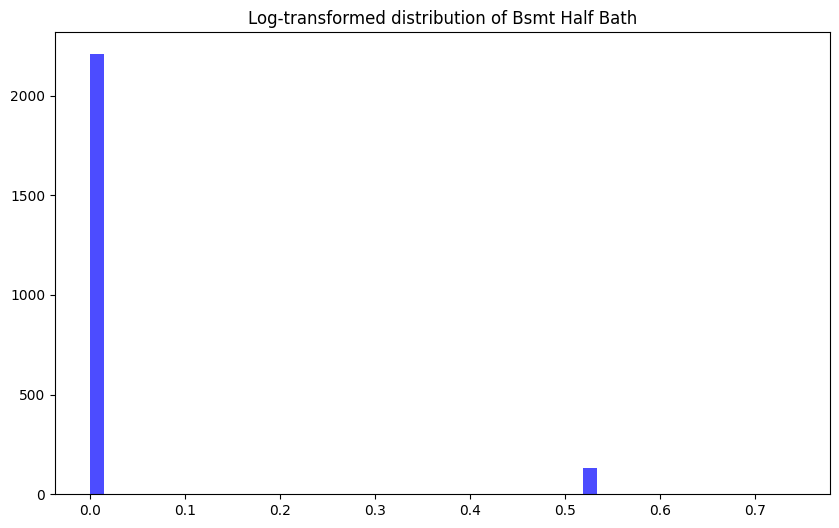

In [18]:
# Apply log transformation (using np.log1p for numerical stability)
X_train[skewed_features.index] = np.log1p(X_train[skewed_features.index])
X_test[skewed_features.index] = np.log1p(X_test[skewed_features.index])

# Visualize the effect of log transformation on one feature
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(X_train[skewed_features.index[0]], bins=50, color='blue', alpha=0.7)
plt.title(f"Log-transformed distribution of {skewed_features.index[0]}")
plt.show()

Transform all the columns where the skew is greater than 0.75, excluding "SalePrice".

Separate features from predictor.

## Question 5

* Write a function **`rmse`** that takes in truth and prediction values and returns the root-mean-squared error. Use sklearn's `mean_squared_error`.  


In [19]:
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))


* Fit a basic linear regression model
* print the root-mean-squared error for this model
* plot the predicted vs actual sale price based on the model.  

Missing values in training data:
Order                       0
PID                         0
MS SubClass                 0
Lot Frontage              393
Lot Area                    0
                         ... 
Sale Condition_AdjLand      0
Sale Condition_Alloca       0
Sale Condition_Family       0
Sale Condition_Normal       0
Sale Condition_Partial      0
Length: 262, dtype: int64
Missing values in test data:
Order                      0
PID                        0
MS SubClass                0
Lot Frontage              97
Lot Area                   0
                          ..
Sale Condition_AdjLand     0
Sale Condition_Alloca      0
Sale Condition_Family      0
Sale Condition_Normal      0
Sale Condition_Partial     0
Length: 262, dtype: int64
Missing values after imputation in training data:
Order                     0
PID                       0
MS SubClass               0
Lot Frontage              0
Lot Area                  0
                         ..
Sale Condition_AdjL

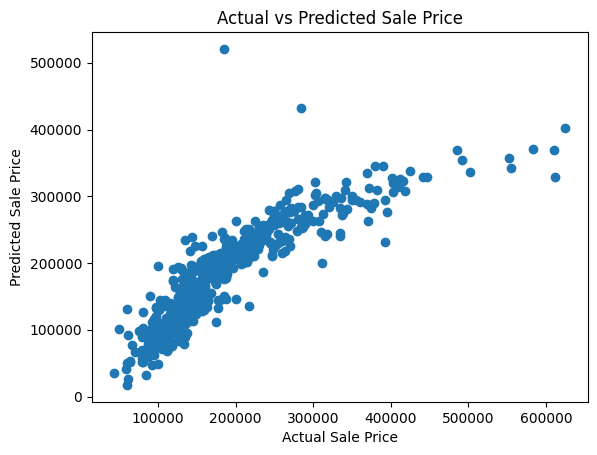

In [21]:
# Check for missing values in the training and test datasets
print("Missing values in training data:")
print(X_train.isnull().sum())

print("Missing values in test data:")
print(X_test.isnull().sum())

X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

print("Missing values after imputation in training data:")
print(X_train.isnull().sum())

print("Missing values after imputation in test data:")
print(X_test.isnull().sum())

from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

from sklearn.metrics import mean_squared_error
import numpy as np

def rmse(true_values, predicted_values):
    return np.sqrt(mean_squared_error(true_values, predicted_values))

error = rmse(y_test, y_pred)
print(f"RMSE for Linear Regression: {error}")

import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price')
plt.show()


## Question 6

Ridge regression uses L2 normalization to reduce the magnitude of the coefficients. This can be helpful in situations where there is high variance. The regularization functions in Scikit-learn each contain versions that have cross-validation built in.

* Fit a regular (non-cross validated) Ridge model to a range of $\alpha$ values and plot the RMSE using the cross validated error function you created above.
* Use $$[0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]$$ as the range of alphas.
* Then repeat the fitting of the Ridge models using the range of $\alpha$ values from the prior section. Compare the results.

Now for the `RidgeCV` method. It's not possible to get the alpha values for the models that weren't selected, unfortunately. The resulting error values and $\alpha$ values are very similar to those obtained above.

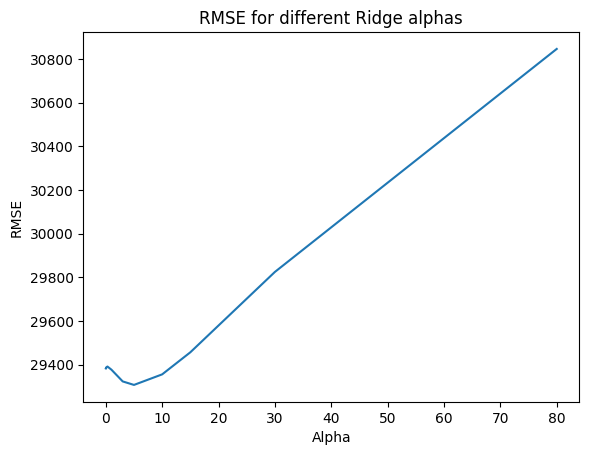

In [22]:
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]
rmse_values = []

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    y_pred_ridge = ridge_model.predict(X_test)
    rmse_values.append(rmse(y_test, y_pred_ridge))

# Plot RMSE values for each alpha
plt.plot(alphas, rmse_values)
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('RMSE for different Ridge alphas')
plt.show()


## Question 7


Much like the `RidgeCV` function, there is also a `LassoCV` function that uses an L1 regularization function and cross-validation. L1 regularization will selectively shrink some coefficients, effectively performing feature elimination.

The `LassoCV` function does not allow the scoring function to be set. However, the custom error function (`rmse`) created above can be used to evaluate the error on the final model.

Similarly, there is also an elastic net function with cross validation, `ElasticNetCV`, which is a combination of L2 and L1 regularization.

* Fit a Lasso model using cross validation and determine the optimum value for $\alpha$ and the RMSE using the function created above. Note that the magnitude of $\alpha$ may be different from the Ridge model.
* Repeat this with the Elastic net model.
* Compare the results via table and/or plot.

Use the following alphas:  
`[1e-5, 5e-5, 0.0001, 0.0005]`

In [23]:
from sklearn.linear_model import LassoCV, ElasticNetCV

alphas_lasso = [1e-5, 5e-5, 0.0001, 0.0005]
alphas_en = [1e-5, 5e-5, 0.0001, 0.0005]
l1_ratios = np.linspace(0.1, 0.9, 9)

# Fit LassoCV
lasso_cv = LassoCV(alphas=alphas_lasso, cv=5)
lasso_cv.fit(X_train, y_train)
y_pred_lasso = lasso_cv.predict(X_test)
print(f"RMSE for LassoCV: {rmse(y_test, y_pred_lasso)}")

# Fit ElasticNetCV
elastic_net_cv = ElasticNetCV(alphas=alphas_en, l1_ratio=l1_ratios, cv=5)
elastic_net_cv.fit(X_train, y_train)
y_pred_en = elastic_net_cv.predict(X_test)
print(f"RMSE for ElasticNetCV: {rmse(y_test, y_pred_en)}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 374248345914.4973, tolerance: 1132319147.6520545
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 374103718698.1676, tolerance: 1132319147.6520545
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 374062250014.12024, tolerance: 1132319147.6520545
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: Convergenc

RMSE for LassoCV: 29400.14271527181


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 408738371148.1587, tolerance: 1132319147.6520545
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 384822760514.03644, tolerance: 1132319147.6520545
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 380172717777.6865, tolerance: 1132319147.6520545
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: Convergenc

RMSE for ElasticNetCV: 29375.012342092046


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.971e+11, tolerance: 1.394e+09
  model = cd_fast.enet_coordinate_descent(


We can determine how many of these features remain non-zero.

Now try the elastic net, with the same alphas as in Lasso, and l1_ratios between 0.1 and 0.9

Comparing the RMSE calculation from all models is easiest in a table.

In [ ]:
#labels = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']


We can also make a plot of actual vs predicted housing prices as before.

## Question 8

Let's explore Stochastic gradient descent in this exercise.  
Recall that Linear models in general are sensitive to scaling.
However, SGD is *very* sensitive to scaling.  
Moreover, a high value of learning rate can cause the algorithm to diverge, whereas a too low value may take too long to converge.

* Fit a stochastic gradient descent model without a regularization penalty (the relevant parameter is `penalty`).
* Now fit stochastic gradient descent models with each of the three penalties (L2, L1, Elastic Net) using the parameter values determined by cross validation above.
* Do not scale the data before fitting the model.  
* Compare the results to those obtained without using stochastic gradient descent.

Notice how high the error values are! The algorithm is diverging. This can be due to scaling and/or learning rate being too high. Let's adjust the learning rate and see what happens.

* Pass in `eta0=1e-7` when creating the instance of `SGDClassifier`.
* Re-compute the errors for all the penalties and compare.

In [24]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import MinMaxScaler

sgd_no_penalty = SGDRegressor(penalty=None, max_iter=1000, random_state=42)
sgd_no_penalty.fit(X_train, y_train)
y_pred_sgd_no_penalty = sgd_no_penalty.predict(X_test)
print(f"RMSE for SGD without penalty: {rmse(y_test, y_pred_sgd_no_penalty)}")

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

sgd_l2 = SGDRegressor(penalty='l2', max_iter=1000, random_state=42)
sgd_l2.fit(X_train_scaled, y_train)
y_pred_sgd_l2 = sgd_l2.predict(X_test_scaled)
print(f"RMSE for SGD with L2 penalty: {rmse(y_test, y_pred_sgd_l2)}")



RMSE for SGD without penalty: 1.4610330969887916e+26
RMSE for SGD with L2 penalty: 29578.25555801637


Now let's scale our training data and try again.

* Fit a `MinMaxScaler` to `X_train` create a variable `X_train_scaled`.
* Using the scaler, transform `X_test` and create a variable `X_test_scaled`.
* Apply the same versions of SGD to them and compare the results. Don't pass in a eta0 this time.

RMSE for SGD model (scaled data): 29698.441952831487


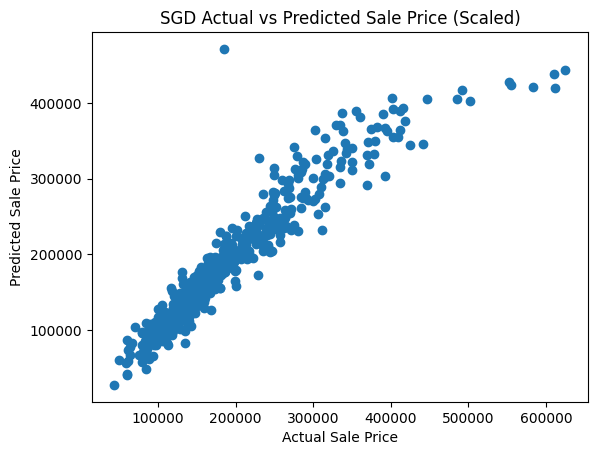

In [26]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDRegressor
import numpy as np
import matplotlib.pyplot as plt

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

sgd_model = SGDRegressor(max_iter=1000, tol=1e-3)
sgd_model.fit(X_train_scaled, y_train)
y_pred_sgd = sgd_model.predict(X_test_scaled)
def rmse(true_values, predicted_values):
    return np.sqrt(np.mean((true_values - predicted_values) ** 2))
error_sgd = rmse(y_test, y_pred_sgd)
print(f"RMSE for SGD model (scaled data): {error_sgd}")
plt.scatter(y_test, y_pred_sgd)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('SGD Actual vs Predicted Sale Price (Scaled)')
plt.show()

